# 0. Importing Libraries #

In [11]:
# Libraries
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# 1. Defining data #

For this example, methanol-water equilibrium data will be used to perform the curve fit.

In [8]:
# Loading data from a source
df = pd.read_csv('methanol_water_data.csv', delimiter = ';')

# Checking data
df.head()

,Methanol_Liquid,Methanol_Vapor
0,0.00,0.000
1,0.02,0.134
2,0.03,0.182
3,0.04,0.230
4,0.05,0.267


In [10]:
# Transforming data to numpy.ndarray type
x = df['Methanol_Liquid'].to_numpy()
y = df['Methanol_Vapor'].to_numpy()

# 2. Curve fit to different orders #

In [14]:
# Defining orders (orders can be manipulated)
orders = [1, 2, 3, 4, 5]

# Ajusting data to different orders and calculating the r2 value
r2_values = []
for order in orders:
    coeffs = np.polyfit(x, y, order) # This numpy function produces the coefficients for the curve fit base on the x & y values
    y_fit = np.polyval(coeffs, x) # This numpy function computes the y values based on the coefficients generated in the last row
    r2 = r2_score(y, y_fit) # Based on the approximation and actual y values, the r2 score is computed using a sklearn metric
    r2_values.append(r2) # Adding the r2 values to the r2 list

# Finding the best order for the curve fit
best_order = orders[np.argmax(r2_values)]

# Fitting the data for the best order
coeffs = np.polyfit(x, y, best_order)
y_fit = np.polyval(coeffs, x)

# 3. Results #

Best-fit polynomial coefficients: [ 1.12140717e+01 -3.32589933e+01  3.74154547e+01 -1.99600034e+01
  5.57169121e+00  2.60410108e-02]
R-squared coefficient: 0.9990957252027864


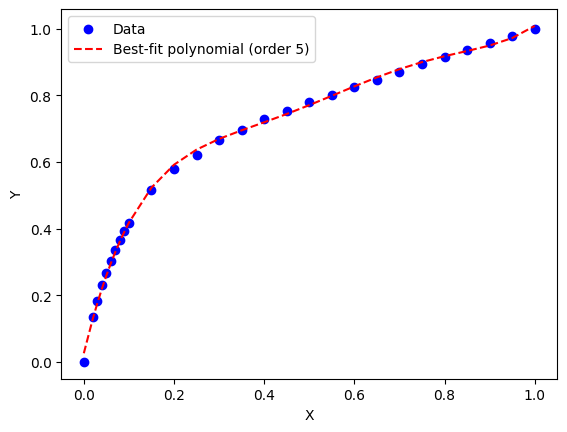

In [16]:
# Plotting the fit
plt.scatter(x, y, label='Data', c='b')
plt.plot(x, y_fit,'--', label='Best-fit polynomial (order {})'.format(best_order), c='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Showing the results
print('Best-fit polynomial coefficients:', coeffs) # The coefficients are giving from the max value in order (n) to the independent value
print('R-squared coefficient:', np.max(r2_values))